# Problem statement
As a part of the an Ad:tech product ecosystem, we need to create an algorithm to better redistribute the budget from the sample data set to derive more actions. 

In the current attached data set, the actions are defined by “link clicks” and the objective for you is to find out the best distribution algorithm that can help our advertiser get more actions from the budget. Couple of pointers you might find important/relevant:
•	The campaign currently is running on a total daily budget of 500. 
•	There is a current daily budget set at each adset
•	You have the last 7 days data to understand the spends (against budget allocated), the frequency at which the ad is shown to the user and number of actions (link clicks) we have been getting


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows',None)
df = pd.read_excel(r'Budget redistribution.xlsx')
df

,Date,Ad set name,Amount spent,Actions,Ad set budget,Frequency
0,2021-11-03,Target group 1,120.80,61.0,156.5,1.349448
1,2021-11-04,Target group 1,119.23,37.0,156.5,1.250163
2,2021-11-05,Target group 1,123.66,44.0,156.5,1.229454
3,2021-11-06,Target group 1,130.73,46.0,156.5,1.215047
4,2021-11-07,Target group 1,124.41,50.0,156.5,1.188039
5,2021-11-08,Target group 1,108.72,29.0,156.5,1.112123
6,2021-11-09,Target group 1,148.93,45.0,156.5,1.133259
7,NaT,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN
9,2021-11-03,Target group 2,288.58,152.0,276.5,1.254738


In [3]:
# Removing NaN
df.dropna(axis=0,inplace=True)
df.reset_index()

,index,Date,Ad set name,Amount spent,Actions,Ad set budget,Frequency
0,0,2021-11-03,Target group 1,120.80,61.0,156.5,1.349448
1,1,2021-11-04,Target group 1,119.23,37.0,156.5,1.250163
2,2,2021-11-05,Target group 1,123.66,44.0,156.5,1.229454
3,3,2021-11-06,Target group 1,130.73,46.0,156.5,1.215047
4,4,2021-11-07,Target group 1,124.41,50.0,156.5,1.188039
5,5,2021-11-08,Target group 1,108.72,29.0,156.5,1.112123
6,6,2021-11-09,Target group 1,148.93,45.0,156.5,1.133259
7,9,2021-11-03,Target group 2,288.58,152.0,276.5,1.254738
8,10,2021-11-04,Target group 2,290.63,124.0,276.5,1.196593
9,11,2021-11-05,Target group 2,302.01,104.0,276.5,1.131482


In [4]:
df.dtypes

Date             datetime64[ns]
Ad set name              object
Amount spent            float64
Actions                 float64
Ad set budget           float64
Frequency               float64
dtype: object

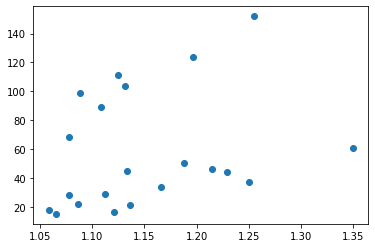

In [5]:
plt.scatter(data=df,x='Frequency',y = 'Actions')

Here we can observe majority of Actions are performed at low frequency

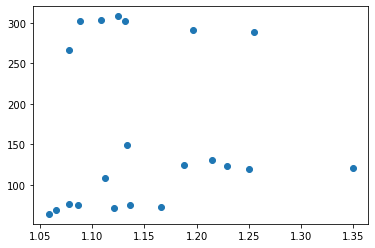

In [6]:
plt.scatter(data=df,x='Frequency',y = 'Amount spent')

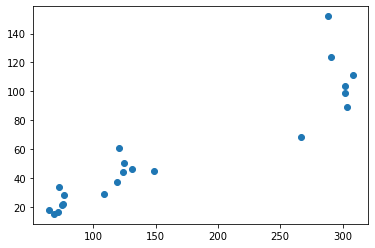

In [7]:
plt.scatter(data=df,x='Amount spent',y = 'Actions')

Here we can observe that as the amount increases the actions also increases

(array([0, 1, 2]),
 [Text(0, 0, 'Target group 1'),
  Text(1, 0, 'Target group 2'),
  Text(2, 0, 'Target group 3')])

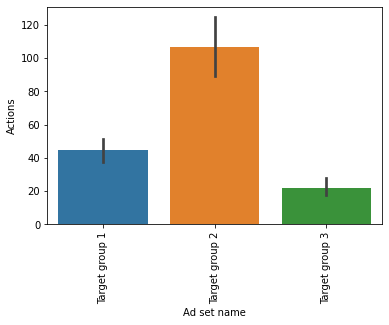

In [8]:
sns.barplot(x="Ad set name",y="Actions", data=df,estimator=np.mean)
plt.xticks(rotation=90)

Target group 2 has higher actions than group 1 than group 3

In [9]:
'''
1. First we have to see the future predictions of Actions if we kept the budget same as it is 
2. We apply our algorithms and do the predictions again and compare with initial model
'''

'\n1. First we have to see the future predictions of Actions if we kept the budget same as it is \n2. We apply our algorithms and do the predictions again and compare with initial model\n'

In [10]:
# Separating target group 1,2,3
df_target_group1 = df[df['Ad set name']=='Target group 1']
df_target_group2 = df[df['Ad set name']=='Target group 2']
df_target_group3 = df[df['Ad set name']=='Target group 3']

In [11]:
df1 = df_target_group1[['Date','Actions']]
df2 = df_target_group2[['Date','Actions']]
df3 = df_target_group3[['Date','Actions']]

In [12]:
df1.head(7)

,Date,Actions
0,2021-11-03,61.0
1,2021-11-04,37.0
2,2021-11-05,44.0
3,2021-11-06,46.0
4,2021-11-07,50.0
5,2021-11-08,29.0
6,2021-11-09,45.0


In [13]:
df1 = df1.set_index('Date')
df2 = df2.set_index('Date')
df3 = df3.set_index('Date')

In [14]:
df1

,Actions
Date,
2021-11-03,61.0
2021-11-04,37.0
2021-11-05,44.0
2021-11-06,46.0
2021-11-07,50.0
2021-11-08,29.0
2021-11-09,45.0


In [15]:
y1 = df1['Actions'].resample("D").mean()  

In [16]:
y1

Date
2021-11-03    61.0
2021-11-04    37.0
2021-11-05    44.0
2021-11-06    46.0
2021-11-07    50.0
2021-11-08    29.0
2021-11-09    45.0
Freq: D, Name: Actions, dtype: float64

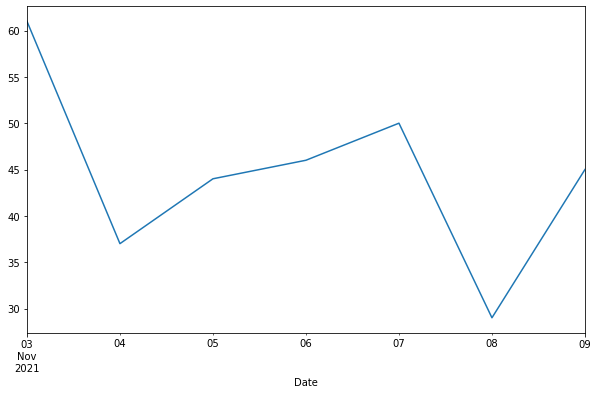

In [17]:
y1.plot(figsize=(10, 6))
plt.show() 

In [18]:
y2 = df2['Actions'].resample("D").mean()
y3 = df3['Actions'].resample("D").mean()

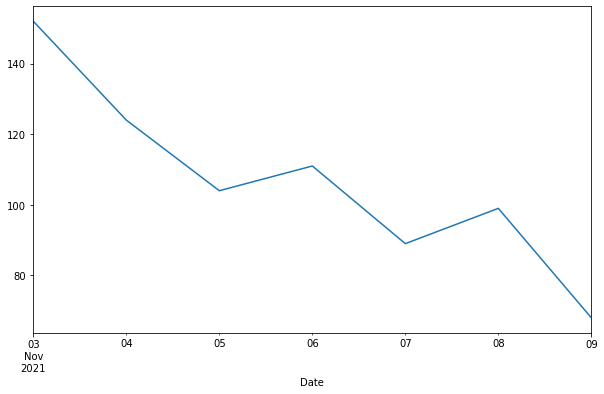

In [19]:
y2.plot(figsize=(10, 6))
plt.show() 

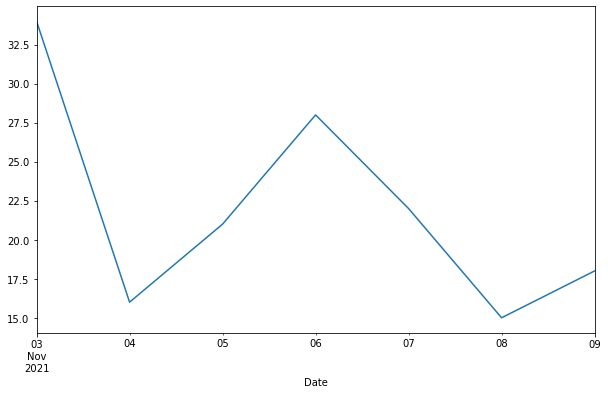

In [20]:
y3.plot(figsize=(10, 6))
plt.show() 

In [21]:
# Implementing Algorithms for Budget Distriution
df = pd.read_excel(r'Budget redistribution.xlsx',index_col = 0)
df

,Ad set name,Amount spent,Actions,Ad set budget,Frequency
Date,,,,,
2021-11-03,Target group 1,120.80,61.0,156.5,1.349448
2021-11-04,Target group 1,119.23,37.0,156.5,1.250163
2021-11-05,Target group 1,123.66,44.0,156.5,1.229454
2021-11-06,Target group 1,130.73,46.0,156.5,1.215047
2021-11-07,Target group 1,124.41,50.0,156.5,1.188039
2021-11-08,Target group 1,108.72,29.0,156.5,1.112123
2021-11-09,Target group 1,148.93,45.0,156.5,1.133259
NaT,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN


In [22]:
# Removing NaN
df.dropna(axis=0,inplace=True)
df.reset_index()

,Date,Ad set name,Amount spent,Actions,Ad set budget,Frequency
0,2021-11-03,Target group 1,120.80,61.0,156.5,1.349448
1,2021-11-04,Target group 1,119.23,37.0,156.5,1.250163
2,2021-11-05,Target group 1,123.66,44.0,156.5,1.229454
3,2021-11-06,Target group 1,130.73,46.0,156.5,1.215047
4,2021-11-07,Target group 1,124.41,50.0,156.5,1.188039
5,2021-11-08,Target group 1,108.72,29.0,156.5,1.112123
6,2021-11-09,Target group 1,148.93,45.0,156.5,1.133259
7,2021-11-03,Target group 2,288.58,152.0,276.5,1.254738
8,2021-11-04,Target group 2,290.63,124.0,276.5,1.196593
9,2021-11-05,Target group 2,302.01,104.0,276.5,1.131482


In [23]:
# Separating target group 1,2,3
df_target_group1 = df[df['Ad set name']=='Target group 1']
df_target_group2 = df[df['Ad set name']=='Target group 2']
df_target_group3 = df[df['Ad set name']=='Target group 3']

# Data Analysis on Target1 Group

In [24]:
df_target_group1

,Ad set name,Amount spent,Actions,Ad set budget,Frequency
Date,,,,,
2021-11-03,Target group 1,120.80,61.0,156.5,1.349448
2021-11-04,Target group 1,119.23,37.0,156.5,1.250163
2021-11-05,Target group 1,123.66,44.0,156.5,1.229454
2021-11-06,Target group 1,130.73,46.0,156.5,1.215047
2021-11-07,Target group 1,124.41,50.0,156.5,1.188039
2021-11-08,Target group 1,108.72,29.0,156.5,1.112123
2021-11-09,Target group 1,148.93,45.0,156.5,1.133259


In [25]:
# Removing irrelevant features
df_target_group1.drop(['Ad set name'],axis = 1,inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df_target_group1

,Amount spent,Actions,Ad set budget,Frequency
Date,,,,
2021-11-03,120.80,61.0,156.5,1.349448
2021-11-04,119.23,37.0,156.5,1.250163
2021-11-05,123.66,44.0,156.5,1.229454
2021-11-06,130.73,46.0,156.5,1.215047
2021-11-07,124.41,50.0,156.5,1.188039
2021-11-08,108.72,29.0,156.5,1.112123
2021-11-09,148.93,45.0,156.5,1.133259


In [27]:
df1 = df_target_group1[['Amount spent','Ad set budget','Frequency','Actions']]

In [28]:
df1

,Amount spent,Ad set budget,Frequency,Actions
Date,,,,
2021-11-03,120.80,156.5,1.349448,61.0
2021-11-04,119.23,156.5,1.250163,37.0
2021-11-05,123.66,156.5,1.229454,44.0
2021-11-06,130.73,156.5,1.215047,46.0
2021-11-07,124.41,156.5,1.188039,50.0
2021-11-08,108.72,156.5,1.112123,29.0
2021-11-09,148.93,156.5,1.133259,45.0


In [29]:
df1.describe(include = 'all')

,Amount spent,Ad set budget,Frequency,Actions
count,7.000000,7.0,7.000000,7.000000
mean,125.211429,156.5,1.211076,44.571429
std,12.404837,0.0,0.078958,10.014276
min,108.720000,156.5,1.112123,29.000000
25%,120.015000,156.5,1.160649,40.500000
50%,123.660000,156.5,1.215047,45.000000
75%,127.570000,156.5,1.239809,48.000000
max,148.930000,156.5,1.349448,61.000000


There is a chance if we increase the amount spent value the frequency will increase which will leads to actions to be more

In [30]:
df1.dtypes

Amount spent     float64
Ad set budget    float64
Frequency        float64
Actions          float64
dtype: object

<Figure size 2160x1080 with 0 Axes>

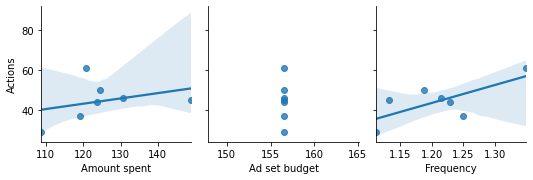

In [31]:
plt.figure(figsize=(30,15))
sns.pairplot(df1,x_vars=df1.columns[0:-1],y_vars="Actions",
                kind='reg')
plt.show()

In [32]:
# creating X and Y
X = df1.iloc[:,:-1] # independent variales
Y = df1.iloc[:,-1] # dependent variable

In [33]:
X.shape,Y.shape

((7, 3), (7,))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Actions', ylabel='Density'>

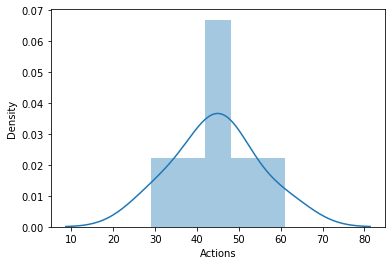

In [34]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribtion
sns.distplot(Y,hist=True)

               Amount spent  Ad set budget  Frequency
Amount spent        1.00000            NaN   -0.17802
Ad set budget           NaN            NaN        NaN
Frequency          -0.17802            NaN    1.00000


<AxesSubplot:>

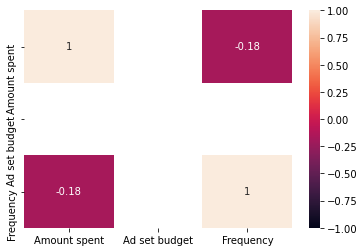

In [35]:
#Assumption of no multicollinearity: There should be no multicolliearity between the independent variables
# eliminate the var which is correlated with many var
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Amount spent,1.03
1,Ad set budget,473.63
2,Frequency,1.03


In [37]:
# dropping Ad set budget from the indep var
X.drop(['Ad set budget'],axis = 1,inplace = True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
X.shape

(7, 2)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10) ## default test_size=0.25

In [40]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
## predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[46.66438698 50.38787818]


In [41]:
lm.score(X_train, Y_train)

0.7269317148918994

In [42]:
new_df1=pd.DataFrame()
new_df1=X_test

new_df1["Actual Actions"]=Y_test
new_df1["Predicted Actions"]=Y_pred
new_df1

<ipython-input-42-b89f58d2ac7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1["Actual Actions"]=Y_test
<ipython-input-42-b89f58d2ac7b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1["Predicted Actions"]=Y_pred


,Amount spent,Frequency,Actual Actions,Predicted Actions
Date,,,,
2021-11-05,123.66,1.229454,44.0,46.664387
2021-11-09,148.93,1.133259,45.0,50.387878


# To see if what should be the good amount spent inorder to get our desired Actions we will create one extra_feature of Desired Actions

In [43]:
# creating desired action feature for Target Group1
df1['Desired_Actions'] = [65.0,40.0,50.0,50.0,55.0,35.0,50.0]

<ipython-input-43-3ddb771ba31e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Desired_Actions'] = [65.0,40.0,50.0,50.0,55.0,35.0,50.0]


In [44]:
df1

,Amount spent,Ad set budget,Frequency,Actions,Desired_Actions
Date,,,,,
2021-11-03,120.80,156.5,1.349448,61.0,65.0
2021-11-04,119.23,156.5,1.250163,37.0,40.0
2021-11-05,123.66,156.5,1.229454,44.0,50.0
2021-11-06,130.73,156.5,1.215047,46.0,50.0
2021-11-07,124.41,156.5,1.188039,50.0,55.0
2021-11-08,108.72,156.5,1.112123,29.0,35.0
2021-11-09,148.93,156.5,1.133259,45.0,50.0


In [45]:
# Preprocessing the data again
df1 = df1[['Frequency','Actions','Desired_Actions','Amount spent']]

In [46]:
# creating X and Y
X = df1.iloc[:,:-1] # independent variales
Y = df1.iloc[:,-1] # dependent variable

In [47]:
Y

Date
2021-11-03    120.80
2021-11-04    119.23
2021-11-05    123.66
2021-11-06    130.73
2021-11-07    124.41
2021-11-08    108.72
2021-11-09    148.93
Name: Amount spent, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10) ## default test_size=0.25

In [49]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
## predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[104.36866481 130.94970603]


In [50]:
lm.score(X_train, Y_train)

0.9174619066685796

In [51]:
new_df1_rev=pd.DataFrame()
new_df1_rev=X_test

new_df1_rev["Actual_Amount_spent"]=Y_test
new_df1_rev["Predicted_Amount"]=Y_pred
new_df1_rev

<ipython-input-51-ca65d0785fe7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1_rev["Actual_Amount_spent"]=Y_test
<ipython-input-51-ca65d0785fe7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1_rev["Predicted_Amount"]=Y_pred


,Frequency,Actions,Desired_Actions,Actual_Amount_spent,Predicted_Amount
Date,,,,,
2021-11-05,1.229454,44.0,50.0,123.66,104.368665
2021-11-09,1.133259,45.0,50.0,148.93,130.949706


# Here We have predicted the amount should be spent for the increased Actions for target group1

Similarly we can try out for other two Target Groups as well

# Data analysis on target_group2

In [52]:
df_target_group2

,Ad set name,Amount spent,Actions,Ad set budget,Frequency
Date,,,,,
2021-11-03,Target group 2,288.58,152.0,276.5,1.254738
2021-11-04,Target group 2,290.63,124.0,276.5,1.196593
2021-11-05,Target group 2,302.01,104.0,276.5,1.131482
2021-11-06,Target group 2,308.20,111.0,276.5,1.124520
2021-11-07,Target group 2,303.29,89.0,276.5,1.108482
2021-11-08,Target group 2,301.84,99.0,276.5,1.088049
2021-11-09,Target group 2,266.70,68.0,276.5,1.078055


In [53]:
# REpeating the same steps as target group1
# Removing irrelevant features
df_target_group2.drop(['Ad set name','Ad set budget'],axis = 1,inplace = True)

df2 = df_target_group2[['Amount spent','Frequency','Actions']]

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
df2.describe(include = 'all')

,Amount spent,Frequency,Actions
count,7.000000,7.000000,7.000000
mean,294.464286,1.140274,106.714286
std,14.130842,0.063520,26.606480
min,266.700000,1.078055,68.000000
25%,289.605000,1.098266,94.000000
50%,301.840000,1.124520,104.000000
75%,302.650000,1.164038,117.500000
max,308.200000,1.254738,152.000000


In [55]:
# creating desired action feature for Target Group1
df2['Desired_Actions'] = [160.0,140.0,110.0,120.0,95.0,105.0,75.0]

<ipython-input-55-88cd567ef226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Desired_Actions'] = [160.0,140.0,110.0,120.0,95.0,105.0,75.0]


In [56]:
# Preprocessing the data again
df2 = df2[['Frequency','Actions','Desired_Actions','Amount spent']]

In [57]:
df2

,Frequency,Actions,Desired_Actions,Amount spent
Date,,,,
2021-11-03,1.254738,152.0,160.0,288.58
2021-11-04,1.196593,124.0,140.0,290.63
2021-11-05,1.131482,104.0,110.0,302.01
2021-11-06,1.124520,111.0,120.0,308.20
2021-11-07,1.108482,89.0,95.0,303.29
2021-11-08,1.088049,99.0,105.0,301.84
2021-11-09,1.078055,68.0,75.0,266.70


In [58]:
# creating X and Y
X = df2.iloc[:,:-1] # independent variales
Y = df2.iloc[:,-1] # dependent variable

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10) ## default test_size=0.25

In [60]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
## predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[300.88617561 303.58284707]


In [61]:
lm.score(X_train, Y_train)

0.7888679494755301

In [62]:
X_test

,Frequency,Actions,Desired_Actions
Date,,,
2021-11-05,1.131482,104.0,110.0
2021-11-09,1.078055,68.0,75.0


In [63]:
new_df2=pd.DataFrame()
new_df2=X_test

new_df2["Actual_Amount_spent"]=Y_test
new_df2["Predicted_Amount"]=Y_pred
new_df2

<ipython-input-63-35d60d3e691c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2["Actual_Amount_spent"]=Y_test
<ipython-input-63-35d60d3e691c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2["Predicted_Amount"]=Y_pred


,Frequency,Actions,Desired_Actions,Actual_Amount_spent,Predicted_Amount
Date,,,,,
2021-11-05,1.131482,104.0,110.0,302.01,300.886176
2021-11-09,1.078055,68.0,75.0,266.70,303.582847


# Here We have predicted the amount should be spent for the increased Actions for target group2

# Data Analysis for Target Group3

In [64]:
df_target_group3

,Ad set name,Amount spent,Actions,Ad set budget,Frequency
Date,,,,,
2021-11-03,Target group 3,72.35,34.0,67.0,1.165858
2021-11-04,Target group 3,71.98,16.0,67.0,1.120640
2021-11-05,Target group 3,75.05,21.0,67.0,1.135886
2021-11-06,Target group 3,76.34,28.0,67.0,1.077470
2021-11-07,Target group 3,75.47,22.0,67.0,1.086266
2021-11-08,Target group 3,68.72,15.0,67.0,1.065364
2021-11-09,Target group 3,64.19,18.0,67.0,1.058300


In [65]:
# REpeating the same steps as target group1
# Removing irrelevant features
df_target_group3.drop(['Ad set name','Ad set budget'],axis = 1,inplace = True)

df3 = df_target_group3[['Amount spent','Frequency','Actions']]

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
df3.describe(include = 'all')

,Amount spent,Frequency,Actions
count,7.000000,7.000000,7.000000
mean,72.014286,1.101398,22.000000
std,4.321554,0.040150,6.855655
min,64.190000,1.058300,15.000000
25%,70.350000,1.071417,17.000000
50%,72.350000,1.086266,21.000000
75%,75.260000,1.128263,25.000000
max,76.340000,1.165858,34.000000


In [67]:
# creating desired action feature for Target Group1
df3['Desired_Actions'] = [40.0,20.0,25.0,35.0,30.0,25.0,25.0]

<ipython-input-67-f42618b84c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Desired_Actions'] = [40.0,20.0,25.0,35.0,30.0,25.0,25.0]


In [68]:
# Preprocessing the data again
df3 = df3[['Frequency','Actions','Desired_Actions','Amount spent']]

In [69]:
# creating X and Y
X = df3.iloc[:,:-1] # independent variales
Y = df3.iloc[:,-1] # dependent variable

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10) ## default test_size=0.25

In [71]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
## predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[72.70549331 75.11871016]


In [72]:
lm.score(X_train, Y_train)

0.7707354059491126

In [73]:
new_df3=pd.DataFrame()
new_df3=X_test

new_df3["Actual_Amount_spent"]=Y_test
new_df3["Predicted_Amount"]=Y_pred
new_df3

<ipython-input-73-39b0252ff605>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df3["Actual_Amount_spent"]=Y_test
<ipython-input-73-39b0252ff605>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df3["Predicted_Amount"]=Y_pred


,Frequency,Actions,Desired_Actions,Actual_Amount_spent,Predicted_Amount
Date,,,,,
2021-11-05,1.135886,21.0,25.0,75.05,72.705493
2021-11-09,1.058300,18.0,25.0,64.19,75.118710


successfully predicted amount for improvised Actions for target group 3